# LAB 11 : Dimensionality Reduction

  1. Principal Component Analysis (PCA)
  2. Linear Discriminant Analysis (LDA)

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# PCA

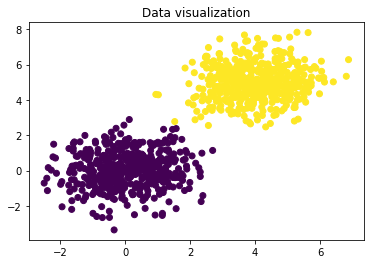

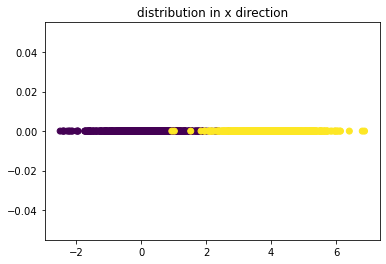

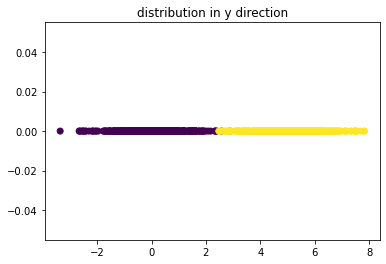

In [91]:
mean1 = np.array([0,0])
mean2 = np.array([4,5])
var = np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1 = np.random.multivariate_normal(mean1,var,500)
data2 = np.random.multivariate_normal(mean2,var,500)
data = np.concatenate((data1,data2))
label = np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c = label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c = label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c = label)
plt.title('distribution in y direction')
plt.show()

New Mean: [-4.25215418e-16  1.79334325e-15], New Std: [1. 1.]


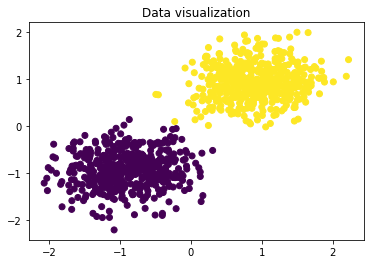

In [92]:
# Data normalization

# Perform data normalization here using mean substraction and std division
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

plt.figure()
plt.scatter(data[:,0],data[:,1],c = label)
plt.title('Data visualization')

print(f"New Mean: {np.mean(data, axis=0)}, New Std: {np.std(data, axis=0)}")

variance along pca1 direction =  1.847766384345973
variance along pca2 direction =  0.152233615654027


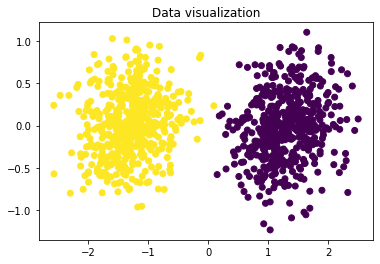

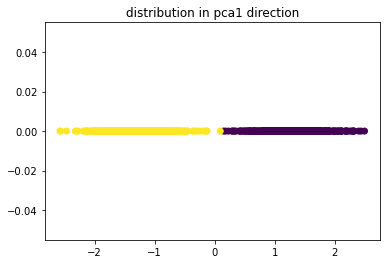

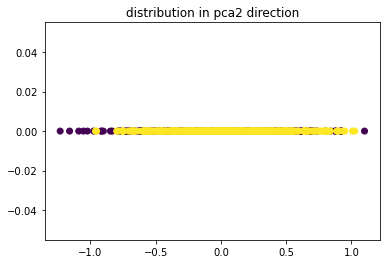

In [93]:
# PCA

# coverance matrix
cov = data.T @ data


# using sigular value decomposition
u, s, v = np.linalg.svd(cov)

trans_data= data @ u

var_pca1 = np.var(trans_data[:,0])
var_pca2 = np.var(trans_data[:,1])

print('variance along pca1 direction = ', var_pca1)
print('variance along pca2 direction = ', var_pca2)


plt.figure()
plt.scatter(trans_data[:,0],trans_data[:,1], c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(trans_data[:,0],np.zeros(data.shape[0]), c=label)
plt.title('distribution in pca1 direction')
plt.figure()
plt.scatter(trans_data[:,1],np.zeros(data.shape[0]), c=label)
plt.title('distribution in pca2 direction')
plt.show()

In [94]:
class pca:
	# Constructor
	def __init__(self, name = 'reg', data = None, retain_dim = None):
		self.name = name  # Create an instance variable
		self.data = data
		self.retain_dim = retain_dim if retain_dim is not None else self.ret_dim(self.data)

	# compute pca transform value
	def pca_comp(self,data):
		data = self.pre_process(data)
		cov = data.T @ data
		u, _, _ = np.linalg.svd(cov) # singular value decomposition
		u_req = u[:, :self.retain_dim]
		trans_data = data @ u_req
		return trans_data, u_req
	
	# compute the required retain dimension
	def ret_dim(self,data):
		data = self.pre_process(data)
		cov = data.T @ data
		_, s, _ = np.linalg.svd(cov)
		ind = np.cumsum(s)/np.sum(s) >= 0.9
		ind = np.where(ind == True)[0][0]
		return ind+1

	# normalize the data
	def pre_process(self,data):
		data1 = (data-np.mean(data,axis = 0))
		data = data1/(np.std(data1,axis = 0)+10**(-30)) # avoid divide by zero
		return data

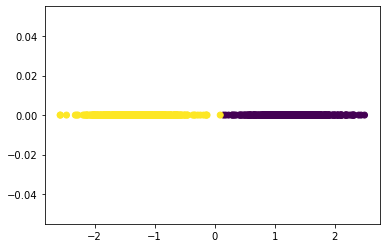

In [95]:
# pca transformation
PCA = pca(data=data)
trans_data, trans_mat = PCA.pca_comp(data)
plt.scatter(trans_data, np.zeros(trans_data.shape), c=label)
plt.show()

In [96]:
# classification using pca
# use k-nearest neighbour classifier after dimensionality reduction

from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(trans_data, label)

print('KNN Training accuracy  = ', knn.score(trans_data,label)*100)

# test data
np.random.seed(0)
data1 = np.random.multivariate_normal(mean1,var,50)
data2 = np.random.multivariate_normal(mean2,var,50)
data = np.concatenate((data1,data2))
tst_label = np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy  = ', knn.score(PCA.pre_process(data) @ trans_mat, tst_label)*100)


KNN Training accuracy  =  99.9
KNN Testing accuracy  =  100.0


## PCA on MNIST

In [97]:
# %pip install idx2numpy

(100, 784)
(100,)


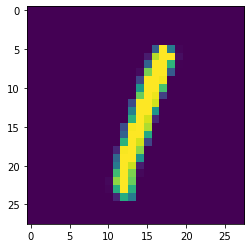

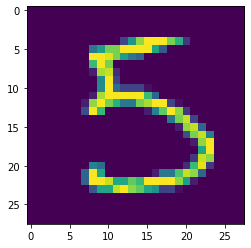

In [98]:
# MNIST data

file1 = 't10k-images-idx3-ubyte'
file2 = 't10k-labels-idx1-ubyte'

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl = [1,5]

# for class 1
id_1 = np.where(labels == cl[0])
id1 = id_1[0]
id1 = id1[:50]
Im_1 = Images[id1,:,:]
lab_1 = labels[id1]

# for class 5
id_5 = np.where(labels == cl[1])
id5 = id_5[0]
id5 = id5[:50]
Im_5 = Images[id5,:,:]
lab_5 = labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

#print(Im_5.shape)

data = np.concatenate((Im_1,Im_5))
data = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab = np.concatenate((lab_1,lab_5))
print(G_lab.shape)

data = data.astype('float32')

data /= 255

Initial data dimension =  784
Retained dimesion after PCA =  34
KNN Training accuracy  =  96.0
(50, 28, 28)
KNN Testing accuracy  =  98.0


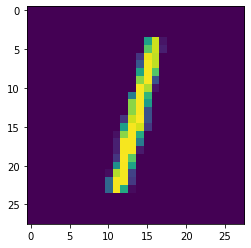

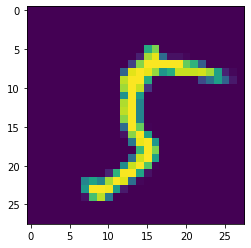

In [99]:
print('Initial data dimension = ',data.shape[1])
PCA = pca(data = data)

trans_data, trans_mat = PCA.pca_comp(data)
print('Retained dimesion after PCA = ',trans_mat.shape[1])
k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy  = ',knn.score(trans_data,G_lab)*100)


## testing
## data preparation
id_1 = np.where(labels == cl[0])
id1 = id_1[0]
id1 = id1[100:150]
Im_1 = Images[id1,:,:]
lab_1 = labels[id1]

# for class 5
id_5 = np.where(labels == cl[1])
id5 = id_5[0]
id5 = id5[100:150]
Im_5 = Images[id5,:,:]
lab_5 = labels[id5]

plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])

print(Im_5.shape)

data_tst = np.concatenate((Im_1,Im_5))
data_tst = np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab = np.concatenate((lab_1,lab_5))


# final testing
print('KNN Testing accuracy  = ', knn.score(PCA.pre_process(data_tst) @ trans_mat,tst_lab)*100)


**Perform PCA on MNIST and Classify taking the data with any 3 Classes**

(150, 784)
(150,)


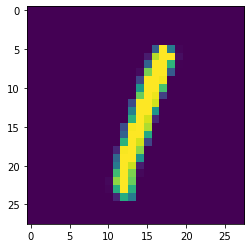

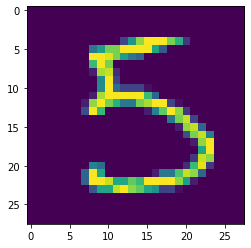

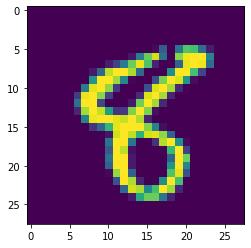

In [100]:
# Prepare data for classification
classes = [1, 5, 8]

# for class 1
id_1 = np.where(labels == classes[0])[0][:50]
Im_1 = Images[id_1,:,:]
lab_1 = labels[id_1]

# for class 5
id_5 = np.where(labels == classes[1])[0][:50]
Im_5 = Images[id_5,:,:]
lab_5 = labels[id_5]

# for class 8
id_8 = np.where(labels == classes[2])[0][:50]
Im_8 = Images[id_8,:,:]
lab_8 = labels[id_8]

# concatenate the data
data = np.concatenate((Im_1,Im_5,Im_8))
data = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab = np.concatenate((lab_1,lab_5,lab_8))
print(G_lab.shape)

# normalize the data
data = data.astype('float32')
data /= 255

# Show the data
plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])
plt.figure()
plt.imshow(Im_8[1,:,:])
plt.show()

In [101]:
# PCA then KNN
PCA = pca(data = data)

trans_data, trans_mat = PCA.pca_comp(data)
print(f"Retained dimesion after PCA = {trans_mat.shape[1]}")
k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(trans_data, G_lab)

print(f"KNN Training accuracy  = {knn.score(trans_data,G_lab)*100}")

# testing
# data preparation
# for class 1
id_1 = np.where(labels == classes[0])[0][100:150]
Im_1 = Images[id_1,:,:]
lab_1 = labels[id_1]

# for class 5
id_5 = np.where(labels == classes[1])[0][100:150]
Im_5 = Images[id_5,:,:]
lab_5 = labels[id_5]

# for class 8
id_8 = np.where(labels == classes[2])[0][100:150]
Im_8 = Images[id_8,:,:]
lab_8 = labels[id_8]

# concatenate the data
data_tst = np.concatenate((Im_1,Im_5,Im_8))
data_tst = np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab = np.concatenate((lab_1,lab_5,lab_8))

# final testing
print(f"KNN Testing accuracy  = {knn.score(PCA.pre_process(data_tst) @ trans_mat,tst_lab)*100}")

Retained dimesion after PCA = 50
KNN Training accuracy  = 91.33333333333333
KNN Testing accuracy  = 86.66666666666667


# LDA

Text(0.5, 1.0, 'distribution in y direction')

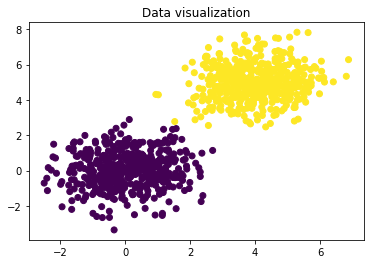

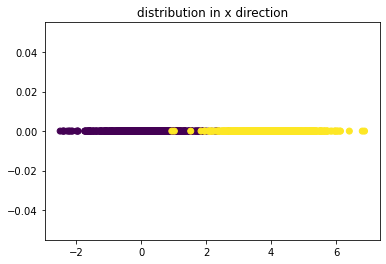

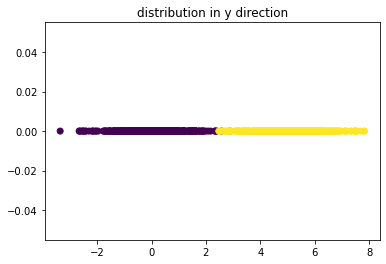

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# data generation

mean1 = np.array([0,0])
mean2 = np.array([4,5])
var = np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1 = np.random.multivariate_normal(mean1,var,500)
data2 = np.random.multivariate_normal(mean2,var,500)
data = np.concatenate((data1,data2))
label = np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c = label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c = label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c = label)
plt.title('distribution in y direction')

In [103]:
# perform 2-class and m-class LDA
def LDA(data,label):  
	id = {}
	data_l = {}
	mean_l = {}
	cov_l = {}
	S_w = np.zeros((data.shape[1],data.shape[1]))
	cls = np.unique(label)

	for i in cls:
		id[i] = np.where(label == i)[0]
		data_l[i] = data[id[i],:]
		mean_l[i] = np.mean(data_l[i],axis = 0)
		cov_l[i] = ((data_l[i] - mean_l[i]).T @ (data_l[i] - mean_l[i])) / (data_l[i].shape[0] - 1)
		S_w = S_w+cov_l[i]

	S_w = S_w/len(data_l)

	if len(data_l) == 2:
		S_b = ((mean_l[0] - mean_l[1]).T @ (mean_l[0] - mean_l[1]))
		w = np.linalg.pinv(S_w) @ (mean_l[0] - mean_l[1]).T

	else:
		S_t = np.cov(data,rowvar = False)
		S_b = S_t - S_w
		u, _, _= np.linalg.svd(np.linalg.pinv(S_w) @ S_b)
		w = u[:,:len(data_l)-1]

	return w

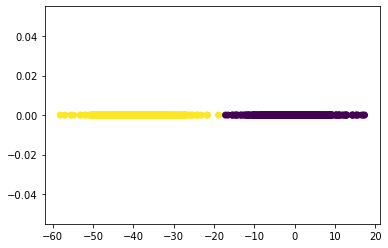

In [104]:
# after LDA projection

w = LDA(data,label)
plt.figure()
plt.scatter(data @ w,np.zeros(data.shape[0]),c = label)


In [105]:
# Classification using LDA
# Use k-nearest neighbour classifier (Scikit Learn) after dimensionality reduction

from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit((data @ w.reshape(-1,1)),label)

print(f"KNN Training accuracy  = {knn.score(data @ w.reshape(-1,1),label)*100}")

# testing
# data preparation
mean1 = np.array([0,0])
mean2 = np.array([4,5])
var = np.array([[1,0.1],[0.1,1]])
np.random.seed(1)
data1 = np.random.multivariate_normal(mean1,var,100)
data2 = np.random.multivariate_normal(mean2,var,100)
data_tst = np.concatenate((data1,data2))
label_tst = np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))
print(f"KNN Testing accuracy  = {knn.score(data_tst @ w.reshape(-1,1),label_tst)*100}")


KNN Training accuracy  = 100.0
KNN Testing accuracy  = 100.0


## LDA Multiclass

Text(0.5, 1.0, 'distribution in y direction')

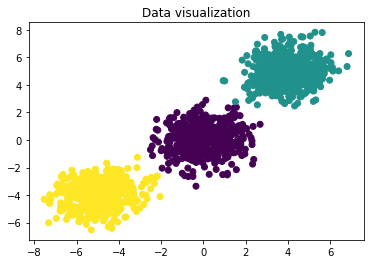

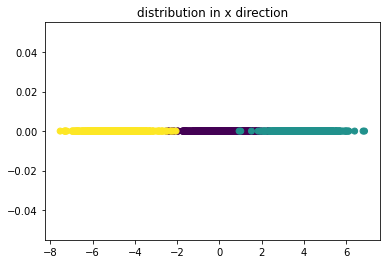

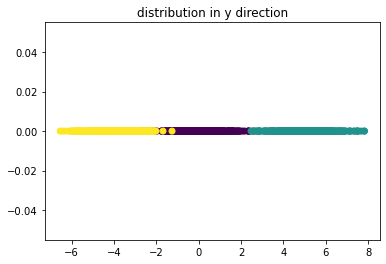

In [106]:
mean1 = np.array([0,0])
mean2 = np.array([4,5])
mean3 = np.array([-5,-4])
var = np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1 = np.random.multivariate_normal(mean1,var,500)
data2 = np.random.multivariate_normal(mean2,var,500)
data3 = np.random.multivariate_normal(mean3,var,500)
data = np.concatenate((data1,data2,data3))
label = np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data3.shape[0])+1))

plt.figure()
plt.scatter(data[:,0],data[:,1],c = label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c = label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c = label)
plt.title('distribution in y direction')


(2, 2)


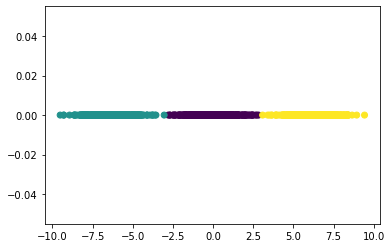

In [107]:
# after projection
w = LDA(data,label)
print(w.shape)
plt.figure()
plt.scatter(data @ w[:,0],np.zeros(data.shape[0]),c = label) # by performing 1D projection

In [108]:
# Testing (using KNN)
# Use k-nearest neighbour classifier (Scikit Learn) after dimensionality reduction

from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(data @ w,label)

print(f"KNN Training accuracy  = {knn.score(data @ w,label)*100}")

# testing
# data preparation
mean1 = np.array([0,0])
mean2 = np.array([4,5])
mean3 = np.array([-5,-4])
var = np.array([[1,0.1],[0.1,1]])
np.random.seed(1)
data1 = np.random.multivariate_normal(mean1,var,100)
data2 = np.random.multivariate_normal(mean2,var,100)
data3 = np.random.multivariate_normal(mean3,var,100)
data_tst = np.concatenate((data1,data2,data3))
label_tst = np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data3.shape[0])+1))
print(f"KNN Testing accuracy  = {knn.score(data_tst @ w,label_tst)*100}")


KNN Training accuracy  = 99.93333333333332
KNN Testing accuracy  = 100.0


**Perform LDA on MNIST and Classify using the data of any 3 classes**

(150, 784)
(150,)


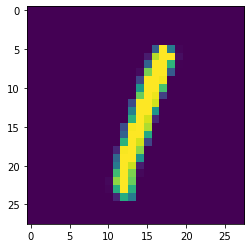

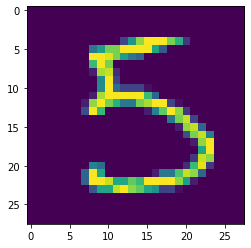

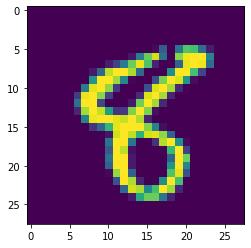

In [109]:
# Prepare data for classification
classes = [1, 5, 8]

# for class 1
id_1 = np.where(labels == classes[0])[0][:50]
Im_1 = Images[id_1,:,:]
lab_1 = labels[id_1]

# for class 5
id_5 = np.where(labels == classes[1])[0][:50]
Im_5 = Images[id_5,:,:]
lab_5 = labels[id_5]

# for class 8
id_8 = np.where(labels == classes[2])[0][:50]
Im_8 = Images[id_8,:,:]
lab_8 = labels[id_8]

# concatenate the data
data = np.concatenate((Im_1,Im_5,Im_8))
data = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab = np.concatenate((lab_1,lab_5,lab_8))
print(G_lab.shape)

# normalize the data
data = data.astype('float32')
data /= 255

# Show the data
plt.imshow(Im_1[1,:,:])
plt.figure()
plt.imshow(Im_5[1,:,:])
plt.figure()
plt.imshow(Im_8[1,:,:])
plt.show()

In [110]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(data,G_lab)

# KNN
k = 5
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(lda.transform(data), G_lab)

print(f"KNN Training accuracy  = {knn.score(lda.transform(data),G_lab)*100}")

# testing
# data preparation
# for class 1
id_1 = np.where(labels == classes[0])[0][100:150]
Im_1 = Images[id_1,:,:]
lab_1 = labels[id_1]

# for class 5
id_5 = np.where(labels == classes[1])[0][100:150]
Im_5 = Images[id_5,:,:]
lab_5 = labels[id_5]

# for class 8
id_8 = np.where(labels == classes[2])[0][100:150]
Im_8 = Images[id_8,:,:]
lab_8 = labels[id_8]

# concatenate the data
data_tst = np.concatenate((Im_1,Im_5,Im_8))
data_tst = np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab = np.concatenate((lab_1,lab_5,lab_8))

print(f"KNN Testing accuracy  = {knn.score(lda.transform(data_tst),tst_lab)*100}")

KNN Training accuracy  = 100.0
KNN Testing accuracy  = 72.0
